<a href="https://colab.research.google.com/github/nikunjchapadia/fastbook/blob/master/digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 6.9 MB/s 
     |████████████████████████████████| 46 kB 3.8 MB/s 
     |████████████████████████████████| 189 kB 41.0 MB/s 
     |████████████████████████████████| 1.2 MB 41.5 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
     |████████████████████████████████| 51 kB 336 kB/s 
Mounted at /content/gdrive


In [3]:
from fastai.vision.all import *
from fastbook import *

In [4]:
matplotlib.rc('image', cmap='Greys')

In [5]:
path = untar_data(URLs.MNIST_SAMPLE)

In [6]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/3'),Path('/root/.fastai/data/mnist_sample/train/7')]

In [7]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid')]

In [8]:
(path/'train'/'3').ls()

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/405.png'),Path('/root/.fastai/data/mnist_sample/train/3/59168.png'),Path('/root/.fastai/data/mnist_sample/train/3/21559.png'),Path('/root/.fastai/data/mnist_sample/train/3/17100.png'),Path('/root/.fastai/data/mnist_sample/train/3/33939.png'),Path('/root/.fastai/data/mnist_sample/train/3/14200.png'),Path('/root/.fastai/data/mnist_sample/train/3/34190.png'),Path('/root/.fastai/data/mnist_sample/train/3/29383.png'),Path('/root/.fastai/data/mnist_sample/train/3/32505.png'),Path('/root/.fastai/data/mnist_sample/train/3/20378.png')...]

In [9]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
sevens

(#6265) [Path('/root/.fastai/data/mnist_sample/train/7/10002.png'),Path('/root/.fastai/data/mnist_sample/train/7/1001.png'),Path('/root/.fastai/data/mnist_sample/train/7/10014.png'),Path('/root/.fastai/data/mnist_sample/train/7/10019.png'),Path('/root/.fastai/data/mnist_sample/train/7/10039.png'),Path('/root/.fastai/data/mnist_sample/train/7/10046.png'),Path('/root/.fastai/data/mnist_sample/train/7/10050.png'),Path('/root/.fastai/data/mnist_sample/train/7/10063.png'),Path('/root/.fastai/data/mnist_sample/train/7/10077.png'),Path('/root/.fastai/data/mnist_sample/train/7/10086.png')...]

In [10]:
im3 = Image.open(threes[1])
im3

In [11]:
im7 = Image.open(sevens[11])
im7

In [12]:
array(im3)[0:50,0:50]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0

In [13]:
array(im7)[0:100,0:100]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  29,  43,  61, 148, 246, 157,   7

In [14]:
tensor(im3)[0:100,0:100]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 2

In [15]:
image3_t = tensor(im3)
dataFrame = pd.DataFrame(image3_t[0:28, 0:28])
dataFrame.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [16]:
three_tensors = [tensor(Image.open(o)) for o in threes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
len(three_tensors),len(seven_tensors)

(6131, 6265)

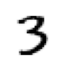

In [17]:
show_image(three_tensors[1])

In [18]:
# get the average of all the images 
three_tensors[1].shape
# three_tensors is a list - not easy to do match 
# stack all 28*28 images on top of each other which is tensor 
# we want mean value so take as float becasue we dont want integers rounding off
# when you work with float expect them to be between 0 and 1 so we devide it by 255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes.shape,stacked_sevens.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

In [19]:
stacked_threes.mean()

tensor(0.1415)

In [20]:
mean3 = stacked_threes.mean(0)
mean3

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.2918e-05, 1.9637e-04, 2.3410e-04, 1.9253e-04, 2.7568e-04, 2.6161e-04,
         2.9423e-04, 2.8400e-04, 1.5671e-04, 4.8612e-05, 5.7567e-06, 0.0000e+00, 0.0000e+

In [21]:
mean3.shape

torch.Size([28, 28])

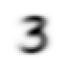

In [22]:
# ideal 3 
show_image(mean3)

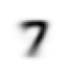

In [23]:
# ideal 7 
mean7 = stacked_sevens.mean(0)
show_image(mean7)

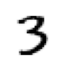

In [24]:
a_3 = stacked_threes[1]
show_image(a_3)

In [34]:
((a_3 - mean3)**2).mean().sqrt()

tensor(0.2021)

In [25]:
 # we going to take any image and check is it close to idea 3 or ideal 7 and 
# based on that we will decide given image is 3 or 7
# 
# we have two approches to get mean value 
# L1 norm, L2 norm 
distance_3_abs = (a_3 - mean3).abs().mean()
distance_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
      
distance_3_abs,distance_3_sqr

(tensor(0.1114), tensor(0.2021))

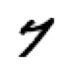

In [35]:
a_7 = stacked_sevens[1]
show_image(a_7)

In [37]:
distance_7_abs = (a_3 - mean7).abs().mean()
distance_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
      
distance_7_abs,distance_7_sqr

(tensor(0.1586), tensor(0.3021))

In [43]:
F.l1_loss(a_3.float(), mean3), F.mse_loss(a_3.float(), mean3).sqrt()

(tensor(0.1114), tensor(0.2021))

In [42]:
F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3.float(), mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [48]:
data = [[1,2,3], [4,5,6]]
array(data)
tns = tensor(data)
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [54]:
# single row
tns[1,:]

tensor([4, 5, 6])

In [53]:
# single column 
tns[:,0]

tensor([1, 4])

In [55]:
# first row and from first to third column but not including 3rd 
tns[1,1:3]

tensor([5, 6])

In [61]:
tns[1,2:3]

tensor([6])

In [63]:
tns + 1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [64]:
tns * 1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [69]:
 # check our model using validation set 
 valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
 valid_3_tens = valid_3_tens.float()/255
 valid_3_tens

 valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
 valid_7_tens = valid_7_tens.float()/255
 valid_7_tens
 
 # good practice to print shape and verify its expected 
 valid_3_tens.shape, valid_7_tens.shape 

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [71]:
# write a function which will decide arbitray image is 3 or a 7 
# -1, -2 : it will take last and second last dimensionns across x and y axis 
# torch.Size([1010, 28, 28]), so here -1 is 28 and -2 28 
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3,mean3)

# next we have to do this for all images in validation set 

tensor(0.1114)

In [73]:
# this is crazy we can do all at once - boradcasting 
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape 

(tensor([0.1092, 0.1133, 0.1309,  ..., 0.1422, 0.1197, 0.1396]),
 torch.Size([1010]))

In [75]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [76]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [78]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [82]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()
accuracy_3s, accuracy_7s, (accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [ ]:
# so far its not real machine learning doesnt match original defination 
# what we wanna do now is - 
# suppose we arrang for some automatic means of testing 
# the effectiveness of any current parameter assignment in terms of actual performance and
# provide a mechanism for altering the parameters assignment so to maximize the performance. 

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:74: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


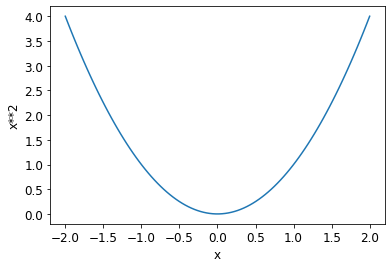

In [83]:
def f(x): return x**2

plot_function(f, 'x', 'x**2')

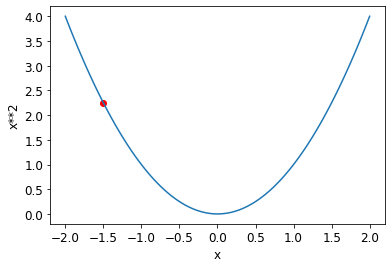

In [84]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red')

In [86]:
# we need to calculate slope and for that we going to need calculus 
# _ indicate we wana calucualte gradients with respect to that variable at that value 
# its tagging the variable so pytorch will remember to keep track of how to compute gradients of the other
# direct calculations on it which you will ask for. 
xt =  tensor(3.).requires_grad_()
xt

tensor(3., requires_grad=True)

In [87]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [88]:
# this will be derivative 
yt.backward() 

In [89]:
xt.grad
# 6 x2 derivative is 2x so here we pass 3 so 2*3 = 6

tensor(6.)

In [90]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [92]:
def f(x): return (x**2).sum()
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [93]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

In [ ]:
# essence of gradient decent 
# w -= gradient(w) * lr 
# lr is number bettwen 0.001 to 0.1 - it can be anything  

In [95]:
# gradient decent 
time = torch.arange(0,20).float(); 
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

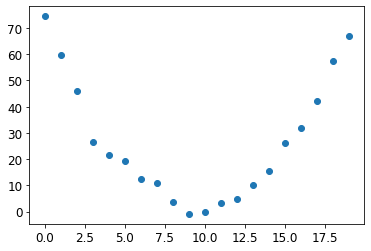

In [96]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed)

In [101]:
 # quadratic equestion a * (time**2) + b*time + c
 # t is input time , params - weight params 
 def quad_fun(t, params): 
   a,b,c = params 
   return a*(t**2) + (b*t) + c

In [102]:
# we need to find some function - loss function 
def mse(preds, targets): return ((preds - targets)**2).mean()

In [103]:
# execute 7 step process
# step 1 : initialize a,b and c to some reasonable random value 
params = torch.randn(3).requires_grad_()
params

tensor([ 0.6863, -0.3278,  0.7950], requires_grad=True)

In [104]:
orig_params = params.clone()
orig_params

tensor([ 0.6863, -0.3278,  0.7950], grad_fn=<CloneBackward0>)

In [105]:
# step 2 : calcualte the predictions 
preds = quad_fun(time, params)
preds

tensor([  0.7950,   1.1535,   2.8847,   5.9886,  10.4651,  16.3142,  23.5360,  32.1304,  42.0975,  53.4372,  66.1496,  80.2346,  95.6922, 112.5225, 130.7254, 150.3010, 171.2492, 193.5701, 217.2636,
        242.3298], grad_fn=<AddBackward0>)

In [108]:
def show_preds(preds, ax=None):
  if ax is None: ax=plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color='red')
  ax.set_ylim(-300,100)

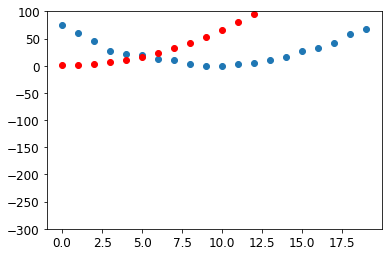

In [109]:
show_preds(preds)

In [110]:
# step 3 : calculate the loss 
loss = mse(preds, speed)
loss

tensor(8631.7373, grad_fn=<MeanBackward0>)

In [111]:
# step 4 : goal is to improve this 
# how ? gradients :)
# calculate the gradients - calculate an approximation of how the parameters need to change
loss.backward()
params.grad

tensor([29901.0918,  1916.4382,   111.7121])

In [112]:
params.grad * 1e-5

tensor([0.2990, 0.0192, 0.0011])

In [113]:
params

tensor([ 0.6863, -0.3278,  0.7950], requires_grad=True)

In [116]:
# step 5 : step the weights 
# update the parameters based on the gradients we just calculated 
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [117]:
# lets see if the loss has improved
preds = quad_fun(time, params)
mse(preds, speed)

tensor(2190.2759, grad_fn=<MeanBackward0>)

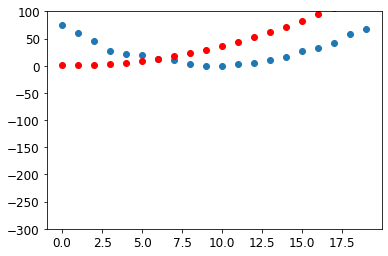

In [118]:
show_preds(preds)

In [119]:
# we need to repeat this few times until we find good 
def apply_step(params, prn=True):
  preds = quad_fun(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= lr * params.grad.data
  params.grad = None
  if prn: print(loss.item())
  return preds 

In [120]:
# step 6 - repeat the process 
for i in range(10): apply_step(params)

2190.27587890625
971.3508911132812
740.6900634765625
697.038818359375
688.775390625
687.2086181640625
686.9088134765625
686.8489990234375
686.8345947265625
686.8284912109375


In [121]:
params = orig_params.detach().requires_grad_()

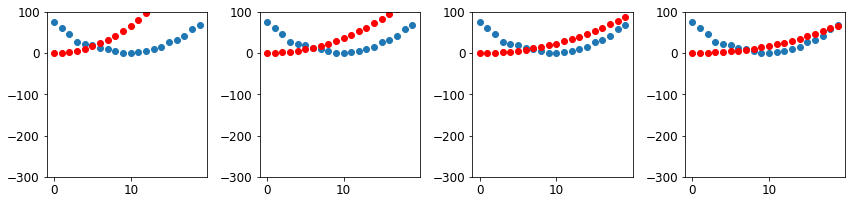

In [124]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [ ]:
# step 7 : stop 
